<a href="https://colab.research.google.com/github/Rupasri20055/Support-Vector-Machines-SVM-/blob/main/Support_Vector_Machines_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap


**Load and Prepare Dataset (Binary Classification)**

In [4]:
#Let’s pick only two classes from Iris for binary classification.
df = pd.read_csv("Iris.csv")

# Keep only Setosa and Versicolor for binary classification
df = df[df['Species'].isin(['Iris-setosa', 'Iris-versicolor'])]

# Encode target variable
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])  # 0 and 1

print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0


** Select Features and Target, Train-Test Split & Standardize**

In [5]:
#Using two features for decision boundary visualization.
X = df[['PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Train SVM (Linear & RBF Kernel)**

Linear Kernel

In [6]:
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)

print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))


Linear Kernel Accuracy: 1.0


RBF Kernel

In [7]:
svm_rbf = SVC(kernel='rbf', C=1, gamma=0.5)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))


RBF Kernel Accuracy: 1.0


**Visualize Decision Boundary (for RBF)**

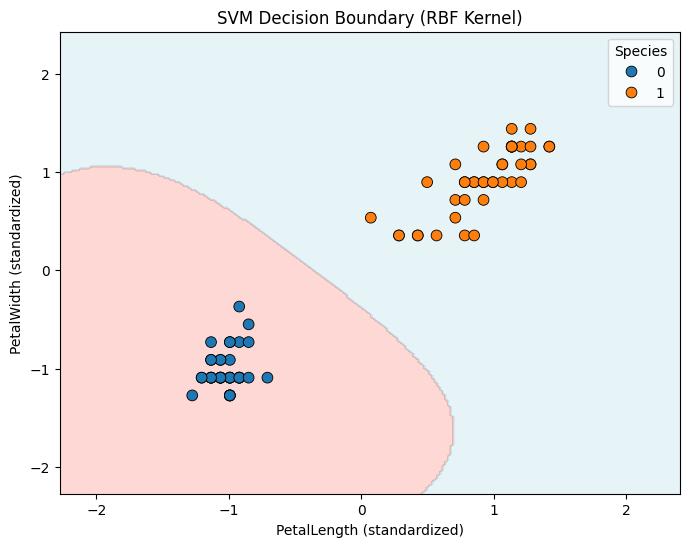

In [8]:
h = .02
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('salmon', 'lightblue')))
sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1], hue=y_train, s=60, edgecolor='k')
plt.title('SVM Decision Boundary (RBF Kernel)')
plt.xlabel('PetalLength (standardized)')
plt.ylabel('PetalWidth (standardized)')
plt.show()


**Tune Hyperparameters (C & gamma)**

In [9]:
for C_val in [0.1, 1, 10]:
    for gamma_val in [0.1, 0.5, 1]:
        model = SVC(kernel='rbf', C=C_val, gamma=gamma_val)
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        acc = accuracy_score(y_test, preds)
        print(f"C={C_val}, gamma={gamma_val} → Accuracy: {acc:.4f}")


C=0.1, gamma=0.1 → Accuracy: 1.0000
C=0.1, gamma=0.5 → Accuracy: 1.0000
C=0.1, gamma=1 → Accuracy: 1.0000
C=1, gamma=0.1 → Accuracy: 1.0000
C=1, gamma=0.5 → Accuracy: 1.0000
C=1, gamma=1 → Accuracy: 1.0000
C=10, gamma=0.1 → Accuracy: 1.0000
C=10, gamma=0.5 → Accuracy: 1.0000
C=10, gamma=1 → Accuracy: 1.0000


**Cross-validation Score (RBF model)**

In [10]:
cv_scores = cross_val_score(svm_rbf, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0
